# 1. Imports and Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2025-05-27 19:14:28.614045: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 19:14:28.744048: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 19:14:29.567739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 19:14:29.716993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748373269.912281    3143 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748373269.97

# 2. Data Collection

In [3]:
# Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42)

# Image dimensions
image_height, image_width, channels = x_train_final.shape[1:4]
num_classes = y_train_cat.shape[1]

# 3. Data Validation


Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


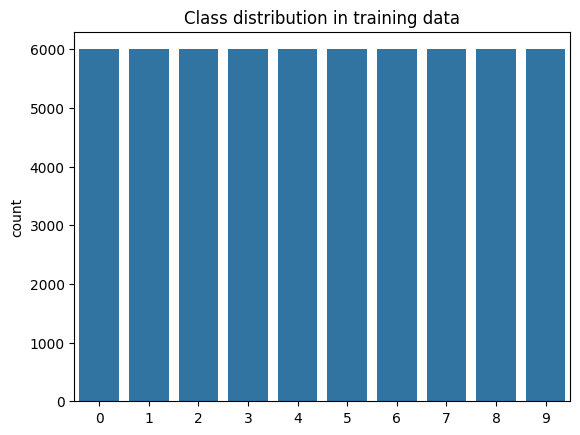

In [4]:
# Check shapes and sample distributions
print('Training data shape:', x_train_final.shape)
print('Validation data shape:', x_val.shape)
print('Test data shape:', x_test.shape)
sns.countplot(x=y_train.flatten())
plt.title('Class distribution in training data')
plt.show()

# 4. Exploratory Data Analysis

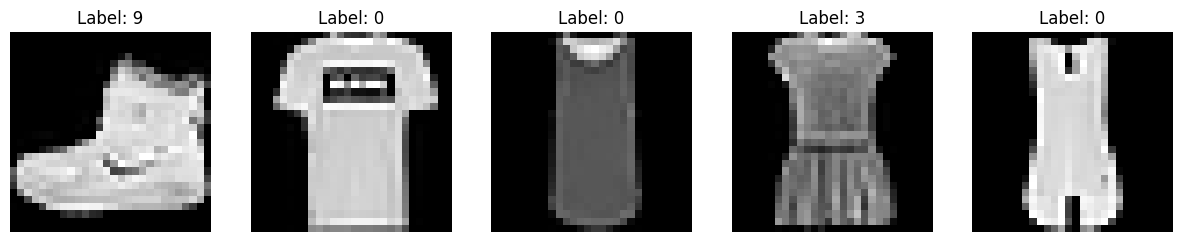

In [5]:
# Display example images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# 5. Model 1: Baseline Model

In [6]:
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-27 19:14:40.761572: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7963 - loss: 0.5835 - val_accuracy: 0.8828 - val_loss: 0.3275
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8935 - loss: 0.2994 - val_accuracy: 0.8992 - val_loss: 0.2782
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9101 - loss: 0.2503 - val_accuracy: 0.9012 - val_loss: 0.2689
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9195 - loss: 0.2193 - val_accuracy: 0.9031 - val_loss: 0.2772
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9315 - loss: 0.1846 - val_accuracy: 0.9076 - val_loss: 0.2582
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9384 - loss: 0.1671 - val_accuracy: 0.9103 - val_loss: 0.2552
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9464 - loss: 0.1416 - val_accuracy: 0.9133 - val_loss: 0.2509
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9523 - loss: 0.1265

# 6. Model 2: Improved Model

In [7]:
model_2 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7913 - loss: 0.5973 - val_accuracy: 0.8833 - val_loss: 0.3242
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8919 - loss: 0.2978 - val_accuracy: 0.8955 - val_loss: 0.2833
Epoch 3/10
  82/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9226 - loss: 0.2211

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9138 - loss: 0.2422 - val_accuracy: 0.9005 - val_loss: 0.2660
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9219 - loss: 0.2117 - val_accuracy: 0.9055 - val_loss: 0.2632
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9344 - loss: 0.1834 - val_accuracy: 0.9122 - val_loss: 0.2392
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9410 - loss: 0.1603 - val_accuracy: 0.9178 - val_loss: 0.2280
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9509 - loss: 0.1375 - val_accuracy: 0.9176 - val_loss: 0.2337
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9562 - loss: 0.1235 - val_accuracy: 0.9133 - val_loss: 0.2533
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9609 - loss: 0.1073 - val_accuracy: 0.9097 - val_loss: 0.2730
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9680 - loss: 0.0

# 7. Model 3: Regularise Model

In [8]:
model_3 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7692 - loss: 0.6785 - val_accuracy: 0.8709 - val_loss: 0.3429
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8705 - loss: 0.3556 - val_accuracy: 0.8859 - val_loss: 0.3034
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8884 - loss: 0.3056 - val_accuracy: 0.9007 - val_loss: 0.2702
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8965 - loss: 0.2832 - val_accuracy: 0.8927 - val_loss: 0.2876
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9055 - loss: 0.2529 - val_accuracy: 0.8904 - val_loss: 0.3178
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9096 - loss: 0.2426 - val_accuracy: 0.8793 - val_loss: 0.3349
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9202 - loss: 0.2146 - val_accuracy: 0.9110 - val_loss: 0.2509
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9255 -

# 8. Model Evaluation

In [9]:
# Evaluate models
val_scores_1 = model_1.evaluate(x_val, y_val)
val_scores_2 = model_2.evaluate(x_val, y_val)
val_scores_3 = model_3.evaluate(x_val, y_val)
print(f"Model 1 Validation Accuracy: {val_scores_1[1]:.4f}")
print(f"Model 2 Validation Accuracy: {val_scores_2[1]:.4f}")
print(f"Model 3 Validation Accuracy: {val_scores_3[1]:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9120 - loss: 0.2875
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9222 - loss: 0.2387
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8991 - loss: 0.2790
Model 1 Validation Accuracy: 0.9110
Model 2 Validation Accuracy: 0.9190
Model 3 Validation Accuracy: 0.8967


# 9. Final Model Testing


Evaluating Model 1 (Baseline)...


Model 1 (Baseline) Test Accuracy: 0.9035

Evaluating Model 2 (Improved)...
Model 2 (Improved) Test Accuracy: 0.9109

Evaluating Model 3 (Regularized)...
Model 3 (Regularized) Test Accuracy: 0.8932

✅ Best Model: Model 2 (Improved) with Test Accuracy: 0.9109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


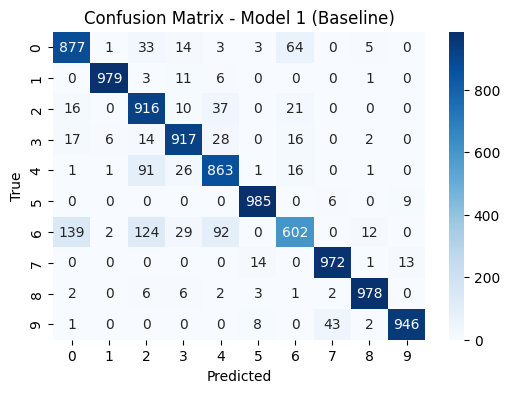

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


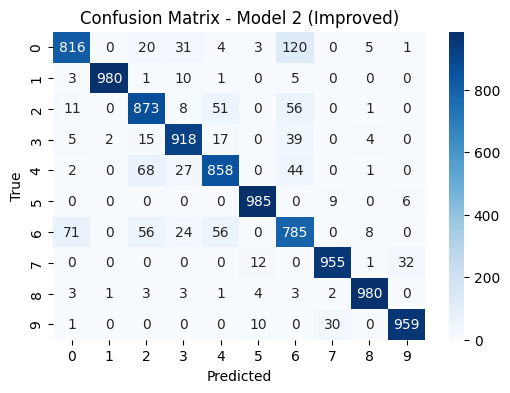

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


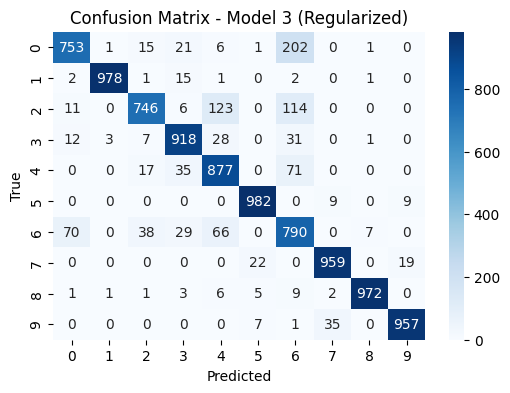

In [ ]:
# Evaluate best model 
# List of models
models = [model_1, model_2, model_3]
model_names = ["Model 1 (Baseline)", "Model 2 (Improved)", "Model 3 (Regularise)"]

# Evaluate each model and store test accuracy
test_accuracies = []

for model, name in zip(models, model_names):
    print(f"Evaluating {name}...")
    test_scores = model.evaluate(x_test, y_test_cat, verbose=0)
    test_accuracies.append(test_scores[1])  # Accuracy is at index 1
    print(f"{name} Test Accuracy: {test_scores[1]:.4f}\n")

# Identify best model
best_index = np.argmax(test_accuracies)
best_name = model_names[best_index]
best_accuracy = test_accuracies[best_index]

print(f"✅ Best Model: {best_name} with Test Accuracy: {best_accuracy:.4f}")

# Plot confusion matrices for all three models
models = [model_1, model_2, model_3]
model_names = ["Model 1 (Baseline)", "Model 2 (Improved)", "Model 3 (Regularise)"]

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_cat, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 10. Summary of Model 

In [11]:
# Summarize performance
print(f"Model 1 Accuracy: {val_scores_1[1]:.4f}")
print(f"Model 2 Accuracy: {val_scores_2[1]:.4f}")
print(f"Model 3 Accuracy: {val_scores_3[1]:.4f}")
# Choose best model based on val/test performance
val_accuracies = [val_scores_1[1], val_scores_2[1], val_scores_3[1]]
best_model_index = np.argmax(val_accuracies)
print(f"\nBest performing model on validation set: Model {best_model_index + 1}")

Model 1 Accuracy: 0.9110
Model 2 Accuracy: 0.9190
Model 3 Accuracy: 0.8967

Best performing model on validation set: Model 2
